# LOW CODE ASSIGNMENTS PART 2

## **Pycaret: Regression**

#### Installing required libraries

In [3]:
!pip install pycaret
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

<br>
<br>
<br>

### **Downloading the Auto MPG dataset**

In [1]:
!kaggle datasets download -d uciml/autompg-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 12.3MB/s]


In [2]:
!unzip autompg-dataset.zip

Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


### **Loading required libraries**

In [4]:
import numpy as np
import pandas as pd
from pycaret.regression import *

<br>
<br>
<br>


### **Loading the Auto MPG dataset**

In [5]:
print("Loading Kaggle Auto MPG dataset...")
data = pd.read_csv('auto-mpg.csv')
data.head()

Loading Kaggle Auto MPG dataset...


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### **Setting up Pycaret**

In [6]:
clf_setup = setup(data, target = 'mpg', session_id = 123)

,Description,Value
0,Session id,123
1,Target,mpg
2,Target type,Regression
3,Original data shape,"(398, 9)"
4,Transformed data shape,"(398, 9)"
5,Transformed train set shape,"(278, 9)"
6,Transformed test set shape,"(120, 9)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


#### Comparing the baseline models and saving the best one

In [7]:
print("Comparing models...")
best_model = compare_models()

Comparing models...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,2.7049,13.4283,3.6249,0.7806,0.1418,0.1200,0.0520
huber,Huber Regressor,2.6820,14.8367,3.8151,0.7564,0.1420,0.1144,0.1390
lasso,Lasso Regression,3.2213,18.2161,4.2390,0.6990,0.1655,0.1447,0.0520
llar,Lasso Least Angle Regression,3.2214,18.2165,4.2390,0.6990,0.1655,0.1447,0.0520
knn,K Neighbors Regressor,3.2886,19.5575,4.3969,0.6731,0.1639,0.1391,0.1070
omp,Orthogonal Matching Pursuit,3.3655,19.6398,4.4113,0.6686,0.1755,0.1479,0.0500
et,Extra Trees Regressor,4.4702,35.1004,5.8880,0.4210,0.2317,0.1989,0.1610
lightgbm,Light Gradient Boosting Machine,4.8325,38.5456,6.1843,0.3582,0.2520,0.2245,0.1420
gbr,Gradient Boosting Regressor,4.8675,38.7561,6.2010,0.3556,0.2522,0.2252,0.1130
ada,AdaBoost Regressor,4.7820,38.9987,6.2107,0.3541,0.2492,0.2177,0.1180


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### **Visualizations**

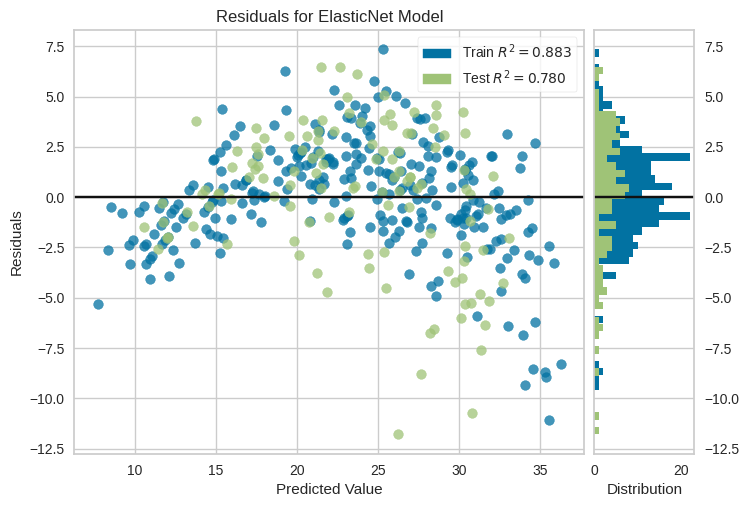

In [8]:
plot_model(best_model, plot = 'residuals')

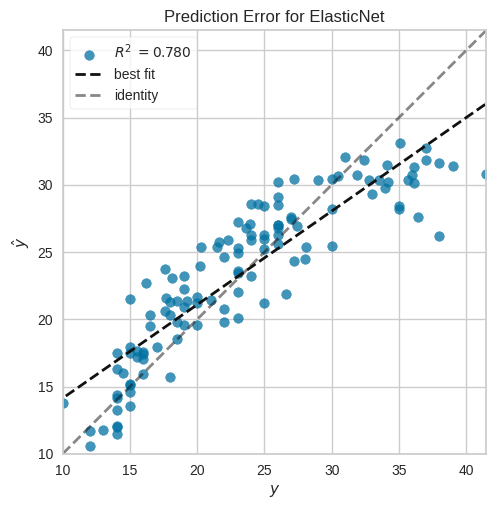

In [9]:
plot_model(best_model, plot = 'error')

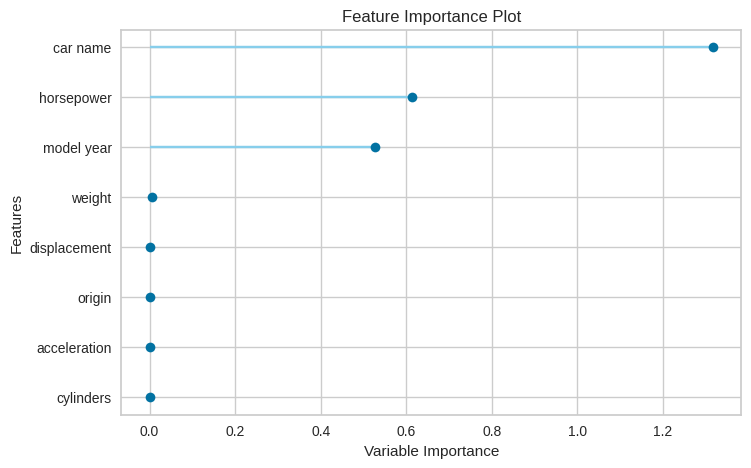

In [10]:
plot_model(best_model, plot = 'feature')

The `evaluate_model` is an alternate to `plot_model`. However, it can only be used in Notebook since it uses `ipywidget`.

In [11]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Checking the accuracy by predicting on the test dataset**

In [12]:
holdout_pred = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,2.7329,12.1567,3.4866,0.7802,0.1349,0.1180


In [13]:
holdout_pred.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg,prediction_label
150,4,108.0,93,2391,15.5,74,3,subaru,26.0,26.802697
42,8,383.0,180,4955,11.5,71,1,dodge monaco (sw),12.0,10.539821
120,4,121.0,112,2868,15.5,73,2,volvo 144ea,19.0,22.271258
102,4,97.0,46,1950,21.0,73,2,volkswagen super beetle,26.0,26.998384
293,4,89.0,71,1925,14.0,79,2,vw rabbit custom,31.9,30.700553


In [14]:
new_data = data.copy()
new_data.drop('mpg', axis=1, inplace=True)
new_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
# predict model on new_data
predictions = predict_model(best_model, data = new_data)
predictions.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,prediction_label
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,15.688128
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,14.503705
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,15.245266
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,14.943125
4,8,302.0,140,3449,10.5,70,1,ford torino,15.933644


### **Saving Model**

In [16]:
save_model(best_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['cylinders', 'displacement',
                                              'weight', 'acceleration',
                                              'model year', 'origin'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['horsepower', 'car name'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['horsepower', 'car name'],
                                     transformer=TargetEncoder(cols=['horsepower',
                                                                     'car name'],
                                                               handle_missing='return_nan'))),
                 ('clean_column_names',
                  Tra

### **Loading the saved model**

In [17]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['cylinders', 'displacement',
                                             'weight', 'acceleration',
                                             'model year', 'origin'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['horsepower', 'car name'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['horsepower', 'car name'],
                                    transformer=TargetEncoder(cols=['horsepower',
                                                                    'car name'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', ElasticNet(random_state=123))])